IMPORTANDO BIBLIOTECAS.

In [ ]:
pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline 

EXPORTANDO OS DADOS. 

Mostramos na tela com o comando df.head() as 5 primeiras linhas do dataset.

In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')
df.shape

(21613, 21)

In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Vamos convergir a data para datetime utilizando o comando to_datetime 

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes


id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

Vizualisar apenas algumas colunas do dataset através de listas.

In [ ]:
df[['price', 'bedrooms']]

,price,bedrooms
0,221900.00,3
1,538000.00,3
2,180000.00,2
3,604000.00,4
4,510000.00,3
...,...,...
21608,360000.00,3
21609,400000.00,4
21610,402101.00,2
21611,400000.00,3


ÍNDICIES BOOLENOS 

In [ ]:
#cols = [ 'true', 'id', 'date' ]
#df.loc[0:10, cols]
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
cols= [True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False]
df.loc[0:10, cols]


,id,price,bedrooms,long
0,7129300520,221900.00,3,-122.26
1,6414100192,538000.00,3,-122.32
2,5631500400,180000.00,2,-122.23
3,2487200875,604000.00,4,-122.39
4,1954400510,510000.00,3,-122.05
5,7237550310,1225000.00,4,-122.00
6,1321400060,257500.00,3,-122.33
7,2008000270,291850.00,3,-122.31
8,2414600126,229500.00,3,-122.34
9,3793500160,323000.00,3,-122.03


RESPONDENDO AS PERGUNTAS DO CO DA ROCKET:  
Qual a data do imovel mais antiga do portfólio? 

In [ ]:
df['date']= pd.to_datetime(df['date'] )
df.sort_values('date', ascending= True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,2014-05-02,437500.00,3,2.25,1970,35100,2.00,0,0,4,9,1970,0,1977,0,98027,47.46,-121.99,2340,35100
9596,472000620,2014-05-02,790000.00,3,2.50,2600,4750,1.00,0,0,4,9,1700,900,1951,0,98117,47.68,-122.40,2380,4750
9587,1024069009,2014-05-02,675000.00,5,2.50,2820,67518,2.00,0,0,3,8,2820,0,1979,0,98029,47.58,-122.03,2820,48351
20602,7853361370,2014-05-02,555000.00,4,2.50,3310,6500,2.00,0,0,3,8,3310,0,2012,0,98065,47.52,-121.87,2380,5000
11577,5056500260,2014-05-02,440000.00,4,2.25,2160,8119,1.00,0,0,3,8,1080,1080,1966,0,98006,47.54,-122.18,1850,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,1422700040,2015-05-14,183000.00,3,1.00,1170,7320,1.00,0,0,3,7,1170,0,1962,0,98188,47.47,-122.28,2040,7320
928,8730000270,2015-05-14,359000.00,2,2.75,1370,1140,2.00,0,0,3,8,1080,290,2009,0,98133,47.71,-122.34,1370,1090
5637,7923600250,2015-05-15,450000.00,5,2.00,1870,7344,1.50,0,0,3,7,1870,0,1960,0,98007,47.60,-122.14,1870,7650
13053,5101400871,2015-05-24,445500.00,2,1.75,1390,6670,1.00,0,0,3,6,720,670,1941,0,98115,47.69,-122.31,920,6380


QUANTOS IMÓVIES POSSUEM O NÚMERO MÁXIMO DE ANDARES?


O número máximo de andares é 3.5.

In [ ]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [ ]:
df[df['floors']==3.5][['floors']].shape

(8, 1)

Agora vamos criar um classificaçõde de imóveis, separando-os em baixo e alto padrão,  de acordo com o preço. 

ACIMA DE 540.000 >  ALTO PADRÃO ( High_standard):  
ABAIXO DE 540.000 >  BAIXO PADRÃO ( Slow_standard):

In [ ]:
df['level'] = 'standard'
#df.columns
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,level
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,standard
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,standard
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,standard
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,standard
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,standard


In [ ]:
df.loc[df['price']>540000, 'level']='high_level'
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,dormitory_type,level
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,2014,studio,NaN
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,2014,studio,NaN
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,2015,studio,NaN
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,2014,studio,high_level
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,2015,studio,NaN


In [ ]:
df.loc[df['price']<540000, 'level'] = 'Slow_level'
df.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,dormitory_type,level
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,2014,studio,Slow_level
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,2014,studio,Slow_level
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,2015,studio,Slow_level
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,2014,studio,high_level
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,2015,studio,Slow_level


RELATÓRIO ORDENADO POR PREÇOS.

In [ ]:
report= df[['id', 'date', 'price', 'bedrooms', 'sqft_lot', 'level' ]].sort_values( 'price', ascending= False ) 
report.head()

,id,date,price,bedrooms,sqft_lot,level
7252,6762700020,2014-10-13,7700000.00,6,27600,high_level
3914,9808700762,2014-06-11,7062500.00,5,37325,high_level
9254,9208900037,2014-09-19,6885000.00,6,31374,high_level
4411,2470100110,2014-08-04,5570000.00,5,35069,high_level
1448,8907500070,2015-04-13,5350000.00,5,23985,high_level


In [ ]:
report.to_csv('sample_data/projeto_aula2', index=False)

In [ ]:
import plotly.express as px

**CRIAR UM MAPA INDICANDO ONDE AS CASAS ESTÃO LOCALIZADAS GEOGRAFICAMENTE.**  

In [ ]:
df_mapa=df[['id', 'lat', 'long', 'price']]
mapa = px.scatter_mapbox (df_mapa, lat='lat', lon='long',  
                          hover_name='id',
                          hover_data=['price'],  
                          color_discrete_sequence=['fuchsia'],
                          zoom=3,
                          height= 300 )
 
mapa.update_layout( mapbox_style='open-street-map')
mapa.update_layout( height=600, margin={'r':0, 't':0, 'l':0, 'b':0})
mapa.show() 

1-QUAL O NÚMERO DE IMÓVEIS POR ANO DE CONSTRUÇÃO?

2-QUAL O MENOR NÚMERO DE QUARTOS POR ANO DE CONSTRUÇÃO DE IMÓVEIS?

3-QUAL O PREÇO DE COMPRA MAIS ALTO POR CADA NÚMERO DE QUARTO?

4-QUAL A SOMA DE TODOS OS PREÇOS DE COMPRA POR NÚMERO DE QUARTOS?

5-QUAL A SOMA DE TODOS OS PREÇOS DE COMPRA POR NÚMERO DE QUARTOS E BANHEIROS.

6-QUAL O TAMANHO MÉDIO DAS SALAS DOS IMÓVEIS POR ANO DE CONTRUÇÃO. 

7- QUAL OP TAMANHO MEDIANO DAS SALAS DOS IMÓVEIS POR ANO DE CONTRUÇÃO.

8- QUAL É O DESVIO-PADRÃO DOS TAMNAHOS DAS SALAS DOS IMÓVEIS POR ANO DE 
CONSTRUÇÃO. 

9-COMO É O CRESCIMENTO MÉDIO DE COMPRAS DE IMÓVEIS , POR ANO, POR DIA, E POR SEMANA DO ANO. 

10- PLOTAR UM GRÁFICO, IDENTIFICANDO AS CASAS COMO OS MAIORES PREÇOS. 



In [ ]:
df= pd.read_csv('/content/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [ ]:
df[df['bedrooms']==0].shape

(13, 21)

In [ ]:
df_grouped= df[['id', 'bedrooms']].groupby('bedrooms')

In [ ]:
for bedrooms, frame in df_grouped:
  print (' Número de quartos: {}'.format('bedrooms'))
  print (frame.shape, end= 'n\n')

 Número de quartos: bedrooms
(13, 2)n
 Número de quartos: bedrooms
(199, 2)n
 Número de quartos: bedrooms
(2760, 2)n
 Número de quartos: bedrooms
(9824, 2)n
 Número de quartos: bedrooms
(6882, 2)n
 Número de quartos: bedrooms
(1601, 2)n
 Número de quartos: bedrooms
(272, 2)n
 Número de quartos: bedrooms
(38, 2)n
 Número de quartos: bedrooms
(13, 2)n
 Número de quartos: bedrooms
(6, 2)n
 Número de quartos: bedrooms
(3, 2)n
 Número de quartos: bedrooms
(1, 2)n
 Número de quartos: bedrooms
(1, 2)n


**1-QUAL O NÚMERO DE IMÓVEIS POR ANO DE CONSTRUÇÃO?**

In [ ]:
df[['id', 'yr_built']].groupby('yr_built').size()

yr_built
1900     87
1901     29
1902     27
1903     46
1904     45
       ... 
2011    130
2012    170
2013    201
2014    559
2015     38
Length: 116, dtype: int64

*2-QUAL O MENOR NÚMERO DE QUARTOS POR ANO DE CONSTRUÇÃO DE IMÓVEIS?*

In [ ]:
df[['bedrooms','yr_built']].groupby('yr_built').min().reset_index()

,yr_built,bedrooms
0,1900,1
1,1901,2
2,1902,2
3,1903,1
4,1904,2
...,...,...
111,2011,1
112,2012,2
113,2013,2
114,2014,1


**3-QUAL O PREÇO DE COMPRA MAIS ALTO POR CADA NÚMERO DE QUARTO?**



Utilização da Função set_option para to suppress scientific notation in Pandas

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
df[['price', 'bedrooms']].groupby('bedrooms').max()

,price
bedrooms,
0,1295650.00
1,1247000.00
2,3278000.00
3,3800000.00
4,4489000.00
5,7062500.00
6,7700000.00
7,3200000.00
8,3300000.00



**4-QUAL A SOMA DE TODOS OS PREÇOS DE COMPRA POR NÚMERO DE QUARTOS?**
---



In [ ]:
df[['bedrooms', 'price']].groupby('price').sum()

,bedrooms
price,
75000.00,1
78000.00,2
80000.00,1
81000.00,2
82000.00,3
...,...
5350000.00,5
5570000.00,5
6885000.00,6


**5-QUAL A SOMA DE TODOS OS PREÇOS DE COMPRA POR NÚMERO DE QUARTOS E BANHEIROS.**


In [ ]:
df[['price', 'bedrooms', 'bathrooms']].groupby(['bedrooms', 'bathrooms']).sum()

price
bedrooms bathrooms           
0        0.00      3642600.00
         0.75       265000.00
         1.00       228000.00
         1.50       288000.00
         2.50       899950.00
...                       ...
10       2.00       650000.00
         3.00       660000.00
         5.25      1148000.00
11       3.00       520000.00
33       1.75       640000.00

[144 rows x 1 columns]

6-QUAL O TAMANHO MÉDIO DAS SALAS DOS IMÓVEIS POR ANO DE CONTRUÇÃO. 

In [ ]:
df[['sqft_living','yr_built']].groupby('yr_built').mean()

,sqft_living
yr_built,
1900,1732.01
1901,1763.62
1902,1919.63
1903,1507.74
1904,1603.18
...,...
2011,2313.68
2012,2378.74
2013,2636.59


 **QUAL O TAMANHO MEDIANO DAS SALAS DOS IMÓVEIS POR ANO DE CONTRUÇÃO.**

In [ ]:
df[['sqft_living','yr_built']].groupby('yr_built').median()

**8- QUAL É O DESVIO-PADRÃO DOS TAMNAHOS DAS SALAS DOS IMÓVEIS POR ANO DE 
CONSTRUÇÃO.**

In [ ]:
df[['sqft_living','yr_built']].groupby('yr_built').std()

**9-COMO É O CRESCIMENTO MÉDIO DE COMPRAS DE IMÓVEIS , POR ANO, POR DIA, E POR SEMANA DO ANO.** 

PRIMEIRO GRÁFICO.

CRESCIMENTO MÉDIO DE COMPRAS DE IMÓVEIS POR ANO. 

EIXO X ANOS 

EIXO Y = SOMA DOS PREÇOS 

GRÁFICO DE BARRAS.


In [ ]:
#dt.year é um função para extrair somente o ano. 
#df['year'] = pd.to_datetime(df['date']).dt.year
by_year=df[['price', 'year']].groupby('year').sum().reset_index()

<BarContainer object of 2 artists>

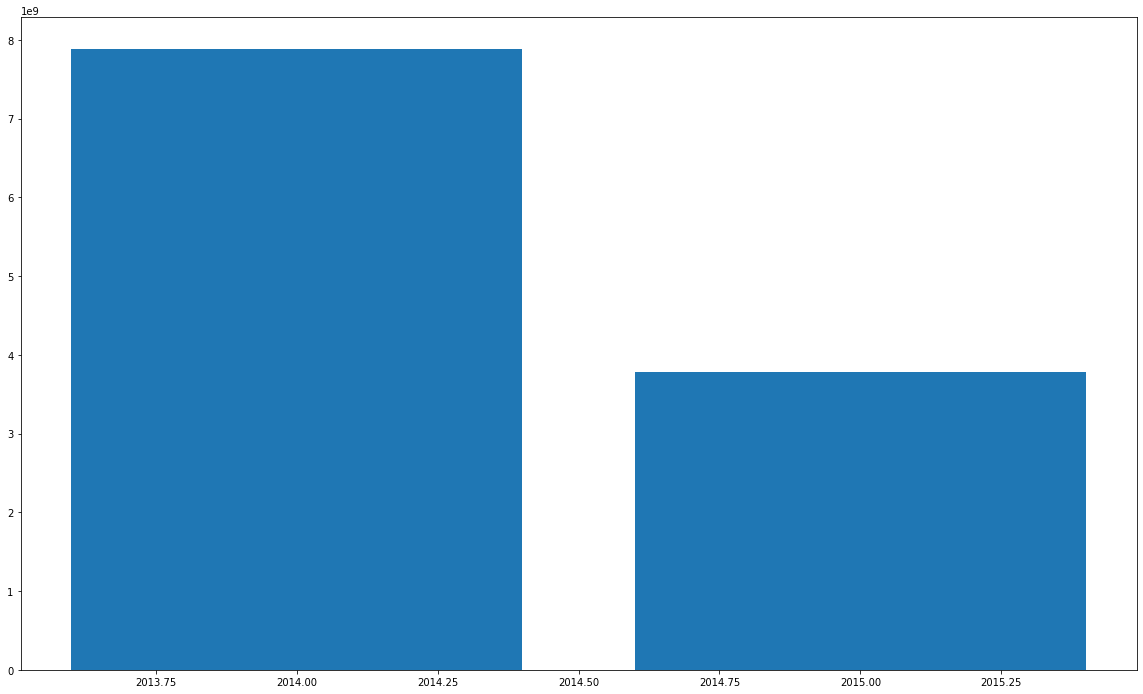

In [ ]:
from matplotlib import  pyplot as plt
plt.figure(figsize=(20, 12))
plt.bar( by_year['year'], by_year['price'])


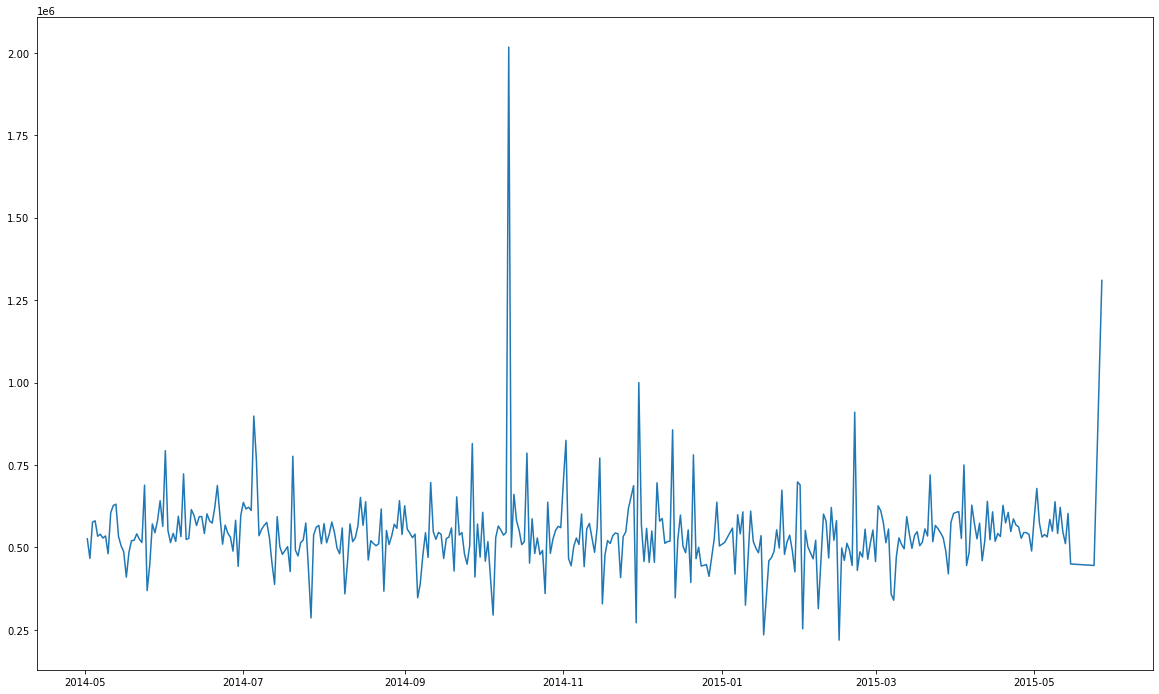

In [ ]:
#SEGUNDO GRÁFICO
df['day'] = pd.to_datetime(df['date'])
by_day = df[['price', 'day']].groupby('day').mean().reset_index()
plt.figure(figsize=(20, 12))
plt.plot( by_day['day'], by_day['price'])


In [ ]:
#TERCEIRO GRÁFICO
#dt.strftime('%Y - %U') utilizando para separa a semana do ano. 
#plt.xticks( Rotation=60); utilzadopara rotacionaro o gráfico e melhorar a vizualização. 
df['year_week'] = pd.to_datetime(df['date']).dt.strftime('%Y - %U')
by_year_week = df[['price', 'year_week']].groupby('year_week').mean().reset_index()
plt.figure(figsize=(20, 12))
plt.plot( by_year_week['year_week'], by_year_week['price'])
plt.xticks( Rotation=60);



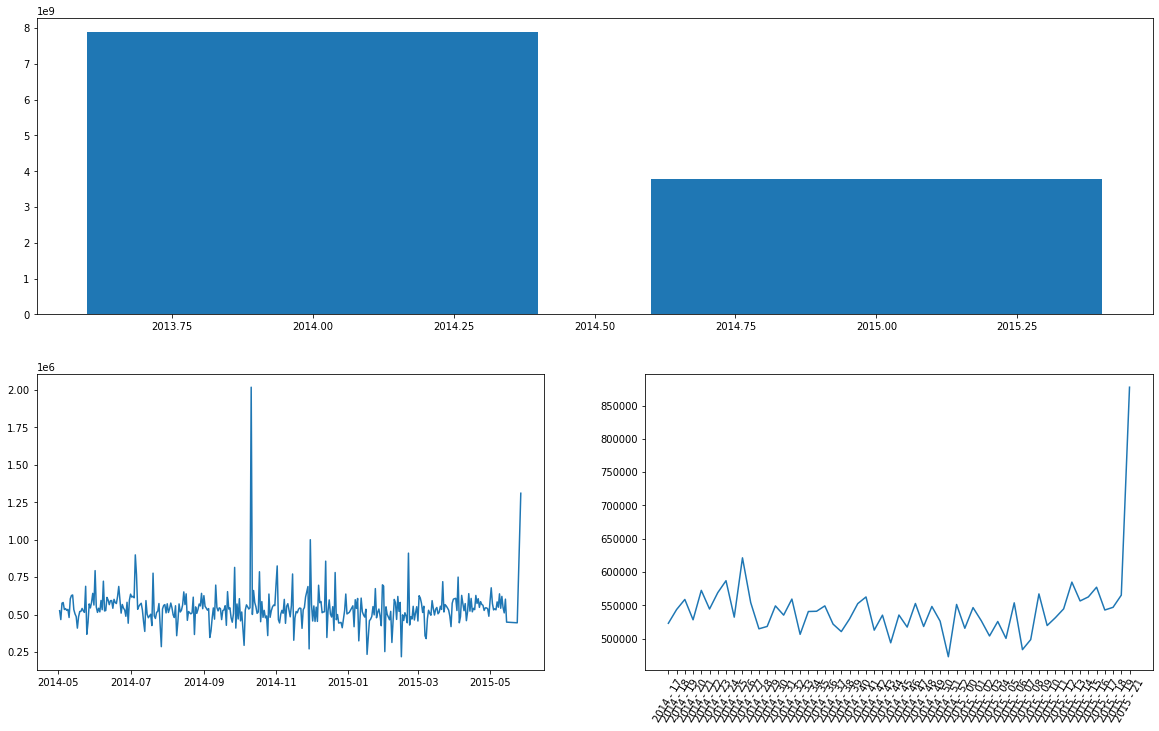

In [ ]:

#CRIAÇÃO DE DASHBOAR. 


from matplotlib import gridspec
fig = plt.figure(figsize=(20, 12))
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig)
ax1= fig.add_subplot( specs[0, :]) #primeira linha.
ax2= fig.add_subplot( specs[1, 0]) # Segunda Linha.
ax3= fig.add_subplot( specs[1, 1]) # Treceira linha. 


# PRIMEIRO GRÁFICO
df['year'] = pd.to_datetime(df['date']).dt.year
by_year = df[['price', 'year']].groupby('year').sum().reset_index()
ax1.bar( by_year['year'], by_year['price'])

#SEGUNDO GRÁFICO
df['day'] = pd.to_datetime(df['date'])
by_day = df[['price', 'day']].groupby('day').mean().reset_index()
ax2.plot( by_day['day'], by_day['price'])

#TERCEIRO GRÁFICO 
df['year_week'] = pd.to_datetime(df['date']).dt.strftime('%Y - %U')
by_year_week = df[['price', 'year_week']].groupby('year_week').mean().reset_index()
ax3.plot( by_year_week['year_week'], by_year_week['price'])
plt.xticks( Rotation=60);



10- PLOTAR UM GRÁFICO, IDENTIFICANDO AS CASAS COMO OS MAIORES PREÇOS. 

In [ ]:
import plotly.express as px

houses = df[[ 'id', 'lat', 'long', 'price']]

fig = px.scatter_mapbox (houses, lat='lat', lon='long',  
                        size ='price',  
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom= 8)   
                        

fig.update_layout( mapbox_style='open-street-map')
fig.update_layout( height=600, margin={'r':0, 't':0, 'l':0, 'b':0})
fig.show()


Novas perguntas do CO da Rocket: 

1- Criar uma nova coluna chamada "dormitory_type".

se o valor da coluna "bedrooms" foi igual a 1 = "studio".
se o valor da coluna "bedrooms" foi igual a 2 = "apartament".
se o valor da coluna "bedrooms" foi maior que 2 = "house".

2- Faça um gráfico de barras que representa a soma dos preços pelo número de quartos. 

3- Faça um gráfico de linhas que representa a média dos preços pelo ano de construção dos imoveis. 

4- Faça um gráfico de barras que representa a média dos preços pelo tipo dos dormitórios.

5- Faça um gráfico de linhas que mostre a evolução da média dos preços pelo ano da reforma dos imóveis , a partir do ano de 1930.

6- faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitorios dos imóveis. 

7- Crie um dashboard com gráficos das questões 02,03,04 ( dashboard: 1 linha de duas colunas)

8- Crie um dashboard com gráficos das questões 02,04 ( dashboard: 2 colunas)

9- Crie um dashboard com gráficos das questões 03,05 ( dashboard: 2 linha )

10- Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar.









In [ ]:
#1- Criar uma nova coluna chamada "dormitory_type".
#se o valor da coluna "bedrooms" foi igual a 1 = "studio". se o valor da coluna "bedrooms" foi igual a 2 = "apartament". se o valor da coluna "bedrooms" foi maior que 2 = "house".

df['dormitory_type']
df.loc[df['bedrooms']==1, 'dormitory_type'] = 'studio'
df.loc[df['bedrooms']==2, 'dormitory_type'] = 'apartament'
df.loc[df['bedrooms']>2, 'dormitory_type'] = 'house'
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,dormitory_type,level
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,2014,house,Slow_level
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,2014,house,Slow_level
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,2015,apartament,Slow_level
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,2014,house,high_level
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,2015,house,Slow_level


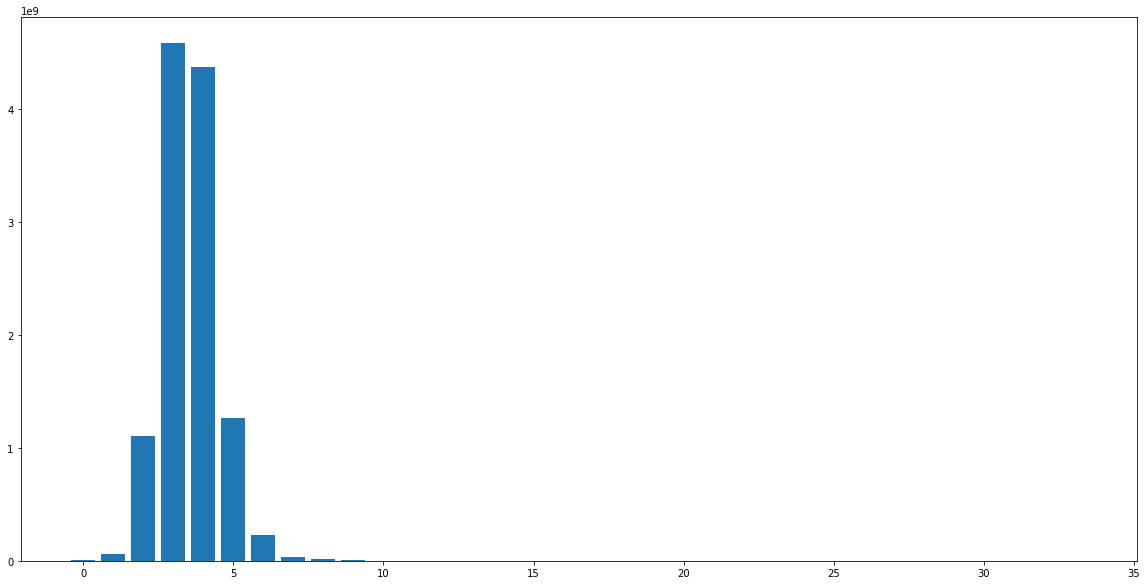

In [ ]:
#MAPA 1 
#2- Faça um gráfico de barras que representa a soma dos preços pelo número de quartos.
by_map1 = df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
from matplotlib import pyplot as plt 
plt.figure(figsize= (20, 10)),
plt.bar(by_map1['bedrooms'], by_map1['price']),
fig.show()




In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'dormitory_type',
       'level', 'day'],
      dtype='object')

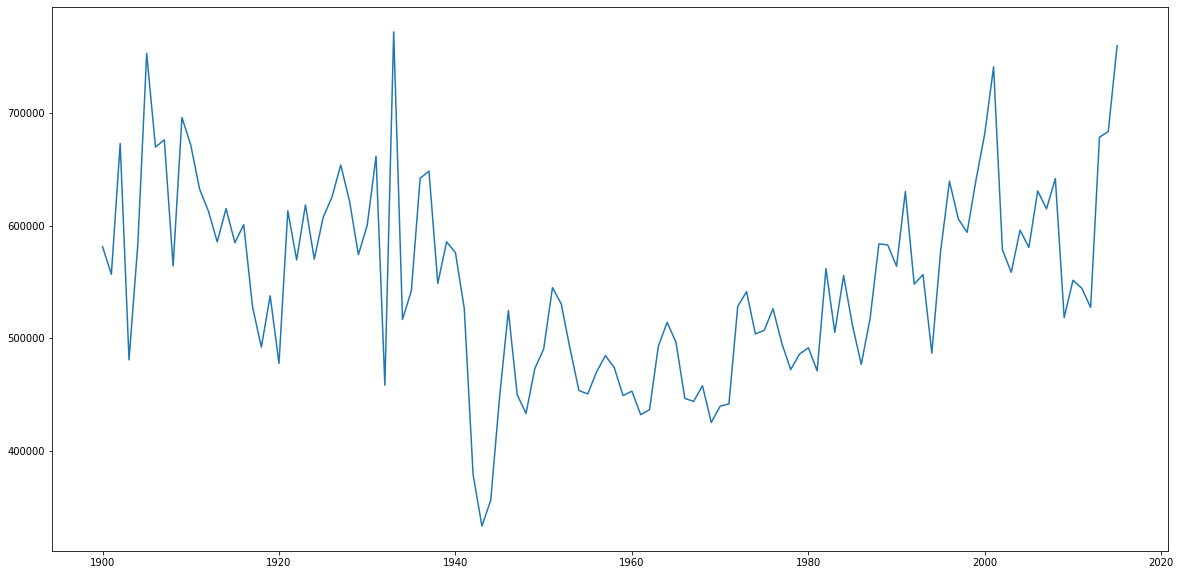

In [ ]:
#MAPA 2
#3- Faça um gráfico de linhas que representa a média dos preços pelo ano de construção dos imoveis.
by_map2= df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()

from matplotlib import pyplot as plt 
plt.figure(figsize=(20,10)),
plt.plot( by_map2['yr_built'], by_map2['price'])
fig.show()

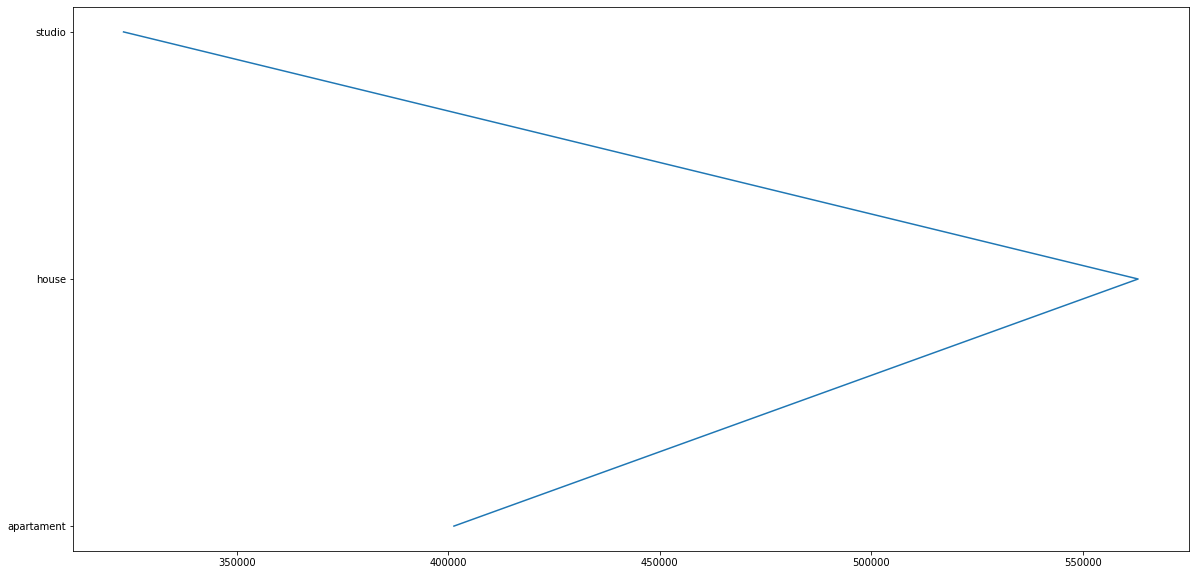

In [ ]:
#MAPA 3
#4- Faça um gráfico de barras que representa a média dos preços pelo tipo dos dormitórios.

by_map3=df[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()

from matplotlib import pyplot as plt
plt.figure(figsize=(20,10)),
plt.plot( by_map3['price'], by_map3['dormitory_type'])
fig.show()

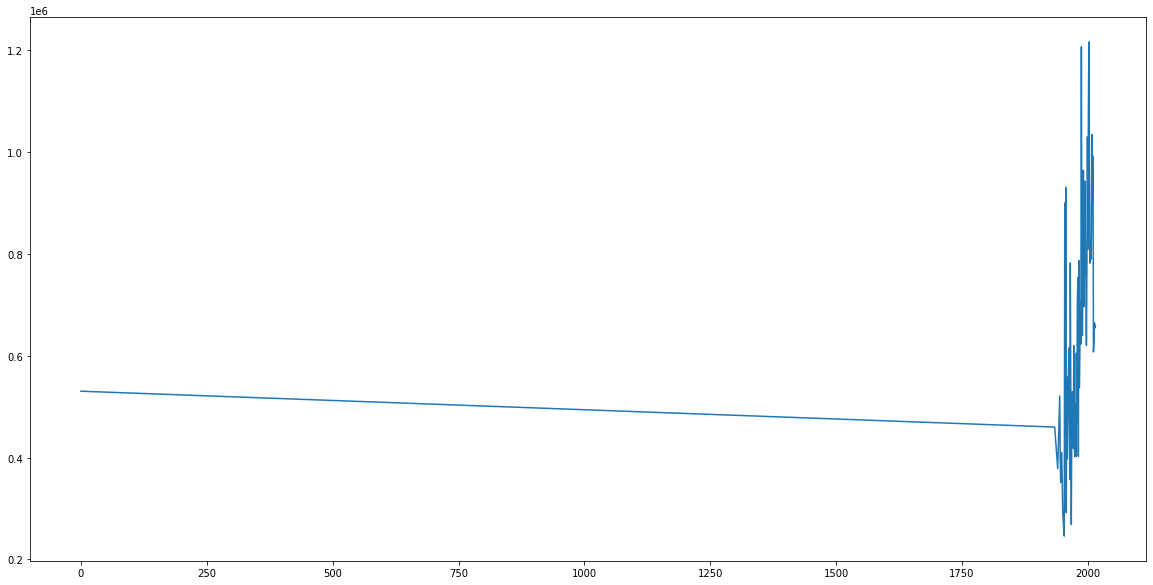

In [ ]:
#MAPA 4
#5- Faça um gráfico de linhas que mostre a evolução da média dos preços pelo ano da reforma dos imóveis , a partir do ano de 1930.

by_map4 = df[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()

plt.figure(figsize=(20,10)),
plt.plot(by_map4['yr_renovated'], by_map4['price'])
fig.show()


In [ ]:
# faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitorios dos imóveis.

df[['price', 'yr_built', 'dormitory_type' ]].groupby(['yr_built', 'dormitory_type']).mean().reset_index()


,yr_built,dormitory_type,price
0,1900,apartament,589533.33
1,1900,house,584854.27
2,1900,studio,398944.00
3,1901,apartament,452856.40
4,1901,house,578619.17
...,...,...,...
304,2014,house,692687.72
305,2014,studio,516500.00
306,2015,apartament,543250.00
307,2015,house,797383.06


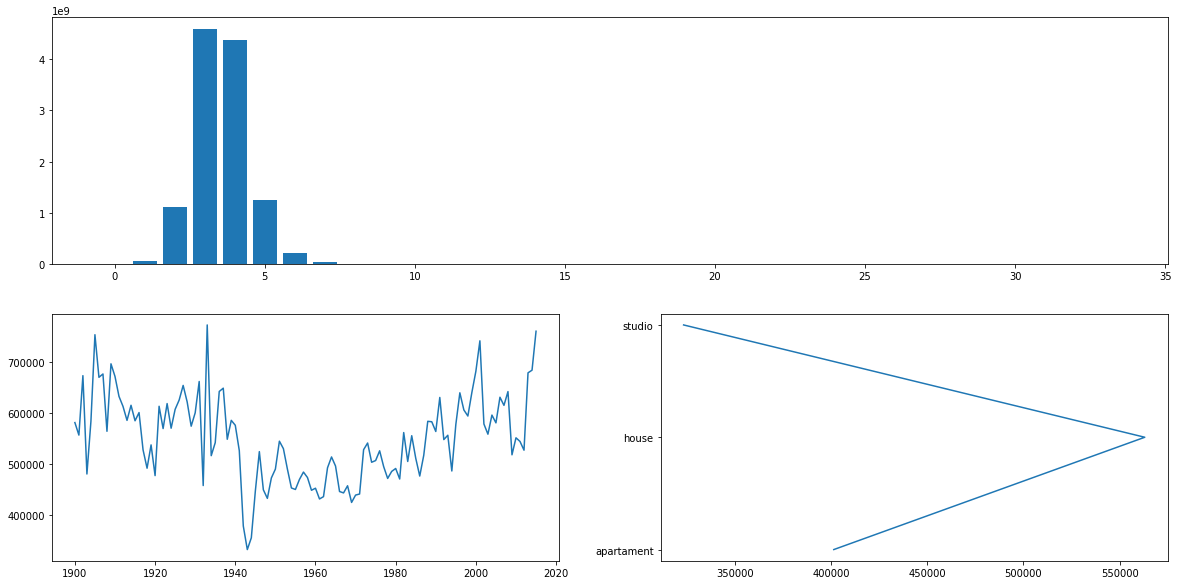

In [ ]:
#7- Crie um dashboard com gráficos das questões 02,03,04 ( dashboard: 1 linha de duas colunas)

from matplotlib import gridspec
fig=plt.figure(figsize=(20,10))
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig)
ax1= fig.add_subplot(specs[0, :])
ax2= fig.add_subplot(specs[1, 0])
ax3= fig.add_subplot(specs[1, 1])

by_map1 = df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
from matplotlib import pyplot as plt 
ax1.bar(by_map1['bedrooms'], by_map1['price']),
fig.show()

by_map2= df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()

from matplotlib import pyplot as plt 
ax2.plot( by_map2['yr_built'], by_map2['price'])
fig.show()

by_map3=df[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()

from matplotlib import pyplot as plt
ax3.plot( by_map3['price'], by_map3['dormitory_type'])
fig.show()




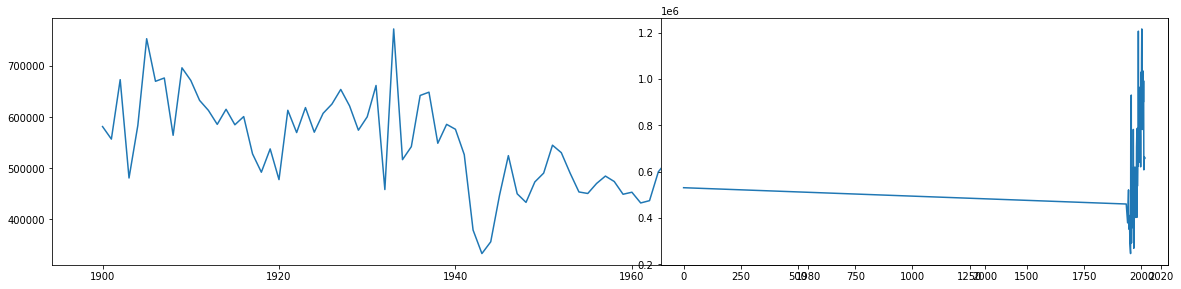

In [ ]:
#8- Crie um dashboard com gráficos das questões 02,04 ( dashboard: 2 colunas)

from matplotlib import gridspec
fig= plt.figure(figsize=(20,10))
specs= gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 =fig.add_subplot(specs[0, :])
ax2=fig.add_subplot(specs[0, 1])


by_map2= df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()

from matplotlib import pyplot as plt 
ax1.plot( by_map2['yr_built'], by_map2['price'])
fig.show()

by_map4 = df[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
ax2.plot(by_map4['yr_renovated'], by_map4['price'])
fig.show()

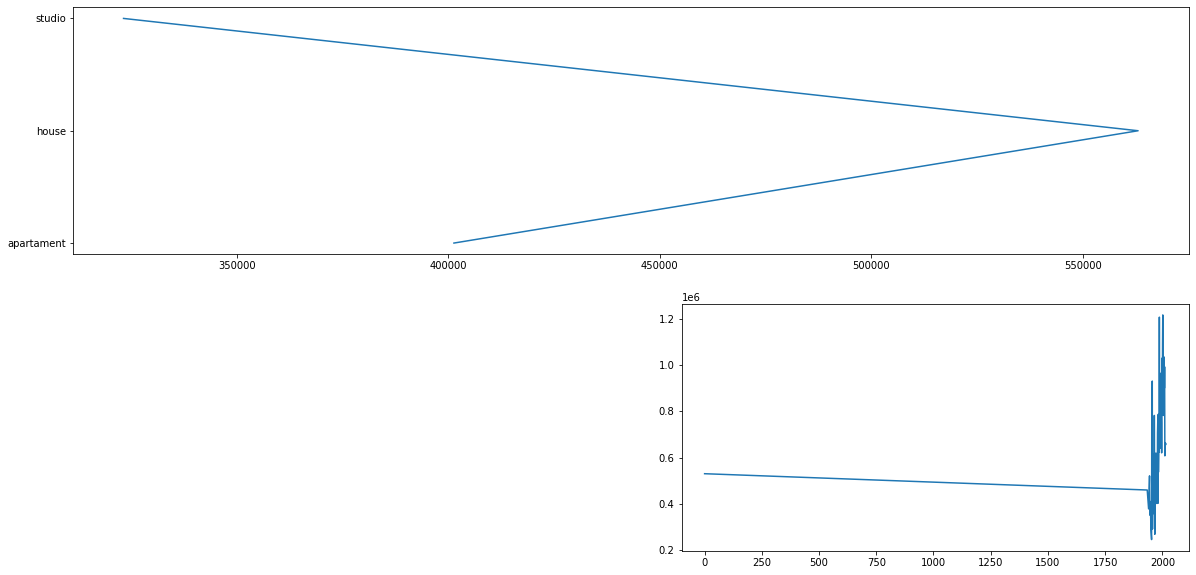

In [ ]:
#Crie um dashboard com gráficos das questões 03,05 ( dashboard: 2 linha )


from matplotlib import gridspec
fig= plt.figure(figsize=(20,10))
specs= gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1=fig.add_subplot(specs[0, :])
ax2=fig.add_subplot(specs[1, 1])

by_map3=df[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()

from matplotlib import pyplot as plt
ax1.plot( by_map3['price'], by_map3['dormitory_type'])
fig.show()

by_map4 = df[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
ax2.plot(by_map4['yr_renovated'], by_map4['price'])
fig.show()




In [ ]:
import plotly.express as px

houses = df[[ 'id', 'lat', 'long', 'sqft_living']]

fig = px.scatter_mapbox (houses, lat='lat', lon='long',  
                        size ='sqft_living',  
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom= 8)   
                        

fig.update_layout( mapbox_style='open-street-map')
fig.update_layout( height=600, margin={'r':0, 't':0, 'l':0, 'b':0})
fig.show()
